<h1>Data Science Nanodegree by Udacity </h1>

<h2>Capstone Project</h2>

<h2>In this project I will use fake and real news dataset. The dataset has been downloaded from Kaggle, and you can find it in this link <a href = 'https://www.kaggle.com/clmentbisaillon/fake-and-real-news-dataset'>dataset</a> </h2>


#### I want to analyze and predict in this project the factors that contribute in detecting real and fake news, and whether it can be detected or not



<h3>Table of Content </h3>
<ol>
<strong> 
<li>
Business Understanding

</li>


<li>
Data Understanding

</li>
<li>
Data Preparation

</li>
<li>
Data Modeling

</li>
<li>
Data Visualization


</li>
<li>
Result Evaluation & Conclusion
</li>

</strong> 
</ol>

#Business Understanding 






1.   What news subject that contribute most in fake news
2.   Is there certain time frame that fake news increase or it has random increasing 
3.   Try to build Machine Learning model that can predict whether the news is fake or real based on the news title, then deploy it to flask web appliaction




In [1]:
#import necessary libraires
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import re
import pickle

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
import nltk
nltk.download(['punkt','stopwords'])
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

# Data Understadning

##### Explore the columns, and some statistics

In [2]:
#Load the Data
df_fake = pd.read_csv('Fake.csv')

df_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [3]:
#Load the Data
df_true = pd.read_csv('True.csv')

df_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
#Explore it shapes
df_true.shape, df_fake.shape

((21417, 4), (23481, 4))

In [5]:
#Explore the trends
df_true.describe()

,title,text,subject,date
count,21417,21417,21417,21417
unique,20826,21192,2,716
top,Factbox: Trump fills top jobs for his administ...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"December 20, 2017"
freq,14,8,11272,182


In [6]:
#Explore the trends
df_fake.describe()

,title,text,subject,date
count,23481,23481,23481,23481
unique,17903,17455,6,1681
top,MEDIA IGNORES Time That Bill Clinton FIRED His...,,News,"May 10, 2017"
freq,6,626,9050,46


In [7]:
#Explore the data types
df_true.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
title      21417 non-null object
text       21417 non-null object
subject    21417 non-null object
date       21417 non-null object
dtypes: object(4)
memory usage: 669.4+ KB


In [8]:
#Explore the data types
df_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
title      23481 non-null object
text       23481 non-null object
subject    23481 non-null object
date       23481 non-null object
dtypes: object(4)
memory usage: 733.9+ KB


In [9]:
#Explore the trends
df_true.subject.value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [10]:
#Explore the trends
df_fake.subject.value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

# Data Preparation


##### After Exploring the data, and finding out that there is no missing values, firstly I am going to delete the duplicated data points, second I am going to assign new column to each dataframe that indicate whether it is true or fake (label = 1 -> true & label = 0 -> fake) then I will merge the true and fake dataframes together, lastly I will tokenize the titles and the text and transform it to make it easier for the model to make predictions.  

In [11]:
print('Number of duplicated values in true news dataframe before deletion operation : ', df_true.duplicated().sum())
print('Number of duplicated values in fake news dataframe before deletion operation : ', df_fake.duplicated().sum())

Number of duplicated values in true news dataframe before deletion operation :  206
Number of duplicated values in fake news dataframe before deletion operation :  3


In [12]:
#Delete Duplicate values on our dataframes
df_fake.drop_duplicates(inplace = True)
df_true.drop_duplicates(inplace = True)

In [13]:
print('Number of duplicated values in true news dataframe after deletion operation : ', df_true.duplicated().sum())
print('Number of duplicated values in fake news dataframe after deletion operation : ', df_fake.duplicated().sum())

Number of duplicated values in true news dataframe after deletion operation :  0
Number of duplicated values in fake news dataframe after deletion operation :  0


In [14]:
#Assign labels to each dataframe to indicate whether it is fake or true
df_fake['label'] = 0
df_true['label'] = 1

In [15]:
#Check Result
df_true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [16]:
#Check Result
df_fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


In [17]:
#Merge the two dataframes into master dataframe (df)
df = pd.concat([df_true, df_fake], axis=0)

In [19]:
#Check Result
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [20]:
# To check if it has been merged or not
df[df['label'] == 1]

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017",1
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017",1
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017",1
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017",1


In [21]:
# To check if it has been merged or not
df[df['label'] == 0]

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [22]:

def tokenize(text):
    """
    The function is used to tokenize text (string)

    Input : Text before tokenization process

    Output: Processed and tokenized text
    """
    text = re.sub(r"[^a-zA-Z0-9]", " ", text.lower())
    text = word_tokenize(text)
    text = [w for w in text if w not in stopwords.words('english')]
    text = [WordNetLemmatizer().lemmatize(w) for w in text]
    return text

# Data Modeling

##### Data splitting (training, and testing), Pipeline creation for transformer which is Count Vectorizer and the classifier which is Logistic Regression, fitting the pipeline to the training set, making predictions in the test set, then printing out the accuracy scores in the training and testing sets.

In [23]:
#Assign title variable as our feature variable 
X = df['title']

In [24]:
#Assign label variable as our label variable
y = df['label']

In [25]:
#Explore the shapes
X.shape, y.shape

((44689,), (44689,))

In [26]:
#Split our features and labels to training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [27]:
#Pipeline creation and fitting
pipeline = Pipeline([
                     ('vect', CountVectorizer(tokenizer=tokenize)),
                     ('clf', LogisticRegression(max_iter=1000))
])

pipeline.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [36]:
#prediction and scoring 
pred = pipeline.predict(X_test)

print('Training Set Score :' , pipeline.score(X_train,y_train))



print('Testing Set Score :' , accuracy_score(y_test,pred))

Training Set Score : 0.982322102167
Testing Set Score : 0.949727754158


**Thankfully the classifier did a great job with accuracy in training and testing sets**

In [29]:
#Save the model as pickle (pkl) to deploy it in the web app
with open('FakeNewsModel.pkl', 'wb') as file:
     pickle.dump(pipeline, file)

In [30]:
#Save the processed dataframe as (CSV) file
df.to_csv('fullData.csv',index = False)

# Data Visualization

## Visualize the data that we want answer on them

#### Question One : What is the most news subject that contribute most in fake news

In [31]:
df_fake['subject'].value_counts()

News               9050
politics           6838
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

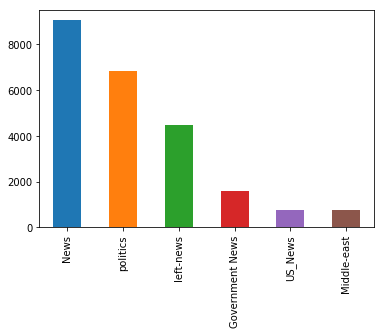

In [32]:
df_fake['subject'].value_counts().plot(kind='bar');

**General news, politics news, and left-news seems to be the most faked news and have it has the larger portion comparing with other subjects**

#### Question Two : Is there certain time frame that fake news increase or it has random increasing

In [33]:
df_fake.date.value_counts().nlargest(10)

May 10, 2017    46
May 5, 2016     44
May 26, 2016    44
May 6, 2016     44
May 11, 2016    43
May 12, 2016    42
May 12, 2017    40
May 9, 2016     40
May 9, 2017     40
May 3, 2016     38
Name: date, dtype: int64

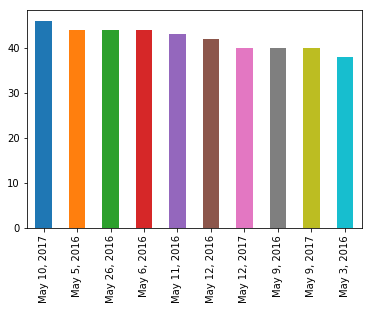

In [34]:
df_fake.date.value_counts().nlargest(10).plot(kind='bar');

**It seems that fake news tend to spread more in (May) as we can see from the ten most frequent dates in our date column all of them are in May**

# Result Evaluation & Conclusion


---


*   **We were able to build machine learining model that can predict whether the news is fake or true based on the title of the news, and we scored almost (98%) accuracy in the training set, and (95%) accuracy in the testing set**
*   **General news, politics news, and left-news seems to be the most faked news and have it has the larger portion comparing with other subjects**

*   **It seems that fake news tend to spread more in (May) as we can see from the ten most frequent dates in our date column all of them are in May**






